In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly # 구매 아이템 정보
import matplotlib.image as mpimg
# 처음엔 overall view하는 것이 세세하게 연령별로 group view 하는 것보다 파악이 빠르다
import plotly.graph_objects as go
import random
import plotly.offline as po
from sklearn.feature_extraction.text import TfidfVectorizer
import gc
from sklearn.model_selection import train_test_split
import pandas as pd


# 코드 출처 주석에 바로 적기

In [6]:
base_path = '../input/h-and-m-personalized-fashion-recommendations/'
csv_train = f'{base_path}transactions_train.csv'
csv_sub = f'{base_path}sample_submission.csv'
csv_users = f'{base_path}customers.csv'
csv_items = f'{base_path}articles.csv'

In [ ]:
debug=True
if debug:
    df = pd.read_csv(csv_train, dtype={'article_id': str}, parse_dates=['t_dat'], nrows=300000)
    df_sub = pd.read_csv(csv_sub)
    dfu = pd.read_csv(csv_users)
    dfi = pd.read_csv(csv_items, dtype={'article_id': str})
else:
    df = pd.read_csv(csv_train, dtype={'article_id': str}, parse_dates=['t_dat'])
    df_sub = pd.read_csv(csv_sub)
    dfu = pd.read_csv(csv_users)
    dfi = pd.read_csv(csv_items, dtype={'article_id': str})

In [36]:
train = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')
train['customer_id'] = train['customer_id'].apply(lambda x: int( x[-16:],16))
train['article_id'] = train.article_id.astype('int32')
train.t_dat = pd.to_datetime(train.t_dat)
train = train[['t_dat','customer_id','article_id']]
print( train.shape )
train.head()

(31788324, 3)


,t_dat,customer_id,article_id
0,2018-09-20,18439897732908966680,663713001
1,2018-09-20,18439897732908966680,541518023
2,2018-09-20,10112112306570742978,505221004
3,2018-09-20,10112112306570742978,685687003
4,2018-09-20,10112112306570742978,685687004


In [38]:

tmp = train.groupby('customer_id').t_dat.max().reset_index()
tmp.columns = ['customer_id','max_dat']
train = train.merge(tmp,on=['customer_id'],how='left')
train['diff_dat'] = (train.max_dat - train.t_dat).dt.days
train = train.loc[train['diff_dat']<=6]
print('Train shape:',train.shape)

Train shape: (5181535, 5)


In [ ]:
tmp = train.groupby(['customer_id','article_id'])['t_dat'].agg('count').reset_index()
tmp.columns = ['customer_id','article_id','ct']
train = train.merge(tmp,on=['customer_id','article_id'],how='left')
train = train.sort_values(['ct','t_dat'],ascending=False)
train = train.drop_duplicates(['customer_id','article_id'])
train = train.sort_values(['ct','t_dat'],ascending=False)
train.head()

In [ ]:
# USE PANDAS TO MAP COLUMN WITH DICTIONARY
import pandas as pd, numpy as np

import pandas as pd, numpy as np
vc = df.article_id.value_counts()
pairs = {}
for j,i in enumerate(vc.index.values):
    if j%10==0: print(j,', ',end='')
    USERS = df.loc[df.article_id==i,'customer_id'].unique()
    vc2 = df.loc[(df.customer_id.isin(USERS))&  (df.article_id!=i ),'article_id']
    if len(vc2)==0: continue
    vc2 = vc2.value_counts()
    pairs[i] = vc2.index[0]

In [ ]:
pairs

In [ ]:
train['article_id2'] = train.article_id.map(pairs)

In [ ]:
# RECOMMENDATION OF PAIRED ITEMS
train2 = train[['customer_id','article_id2']].copy()
train2 = train2.loc[train2.article_id2.notnull()]
train2 = train2.drop_duplicates(['customer_id','article_id2'])
train2 = train2.rename({'article_id2':'article_id'},axis=1)

In [33]:
# CONCATENATE PAIRED ITEM RECOMMENDATION AFTER PREVIOUS PURCHASED RECOMMENDATIONS
train = train[['customer_id','article_id']]
train = pd.concat([train,train2],axis=0,ignore_index=True)
train.article_id = train.article_id.astype('int32')
train = train.drop_duplicates(['customer_id','article_id'])

NameError: name 'train' is not defined

In [ ]:
# CONVERT RECOMMENDATIONS INTO SINGLE STRING
train.article_id = ' 0' + train.article_id.astype('str')
preds = cudf.DataFrame( train.groupby('customer_id').article_id.sum().reset_index() )
preds.columns = ['customer_id','prediction']
preds.head()
# CONCATENATE PAIRED ITEM RECOMMENDATION AFTER PREVIOUS PURCHASED RECOMMENDATIONS
train = cudf.read_parquet('train.pqt')
train.t_dat = cudf.to_datetime(train.t_dat)
train = train.loc[train.t_dat >= cudf.to_datetime('2020-09-16')]
top12 = ' 0' + ' 0'.join(train.article_id.value_counts().to_pandas().index.astype('str')[:12])
print("Last week's top 12 popular items:")
print( top12 )

In [ ]:
sub = cudf.read_csv('../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv')
sub = sub[['customer_id']]
sub['customer_id_2'] = sub['customer_id'].str[-16:].str.hex_to_int().astype('int64')
sub = sub.merge(preds.rename({'customer_id':'customer_id_2'},axis=1),\
    on='customer_id_2', how='left').fillna('')
del sub['customer_id_2']
sub.prediction = sub.prediction + top12
sub.prediction = sub.prediction.str.strip()
sub.prediction = sub.prediction.str[:131]
sub.to_csv(f'submission.csv',index=False)
sub.head()

In [ ]:
train = train[['customer_id','article_id']]
train = pd.concat([train,train2],axis=0,ignore_index=True)
train.article_id = train.article_id.astype('int32')
train = train.drop_duplicates(['customer_id','article_id'])

In [46]:
# USE PANDAS TO MAP COLUMN WITH DICTIONARY
import pandas as pd, numpy as np
vc = df.article_id.value_counts()
pairs = {}
for j,i in enumerate(vc.index.values):
    if j%10==0: print(j,', ',end='')
    USERS = df.loc[df.article_id==i,'customer_id'].unique()
    vc2 = df.loc[(df.customer_id.isin(USERS))&  (df.article_id!=i ),'article_id']
    if len(vc2)==0: continue
    vc2 = vc2.value_counts()
    pairs[i] = vc2.index[0]

0 , 10 , 20 , 30 , 40 , 50 , 60 , 70 , 80 , 90 , 100 , 110 , 120 , 130 , 140 , 150 , 160 , 170 , 180 , 190 , 200 , 210 , 220 , 230 , 240 , 250 , 260 , 270 , 280 , 290 , 300 , 310 , 320 , 330 , 340 , 350 , 360 , 370 , 380 , 390 , 400 , 410 , 420 , 430 , 440 , 450 , 460 , 470 , 480 , 490 , 500 , 510 , 520 , 530 , 540 , 550 , 560 , 570 , 580 , 590 , 600 , 610 , 620 , 630 , 640 , 650 , 660 , 670 , 680 , 690 , 700 , 710 , 720 , 730 , 740 , 750 , 760 , 770 , 780 , 790 , 800 , 810 , 820 , 830 , 840 , 850 , 860 , 870 , 880 , 890 , 900 , 910 , 920 , 930 , 940 , 950 , 960 , 970 , 980 , 990 , 1000 , 1010 , 

KeyboardInterrupt: 

array(['0706016001', '0706016002', '0372860001', ..., '0586904003',
       '0512385003', '0533261032'], dtype=object)

In [ ]:
len(pairs)

In [ ]:
train['article_id2'] = train.article_id.map(pairs)

In [ ]:
tmp = train.groupby(['customer_id','article_id'])['t_dat'].agg('count').reset_index()
tmp.columns = ['customer_id','article_id','ct']
train = train.merge(tmp,on=['customer_id','article_id'],how='left')
train = train.sort_values(['ct','t_dat'],ascending=False)
train = train.drop_duplicates(['customer_id','article_id'])
train = train.sort_values(['ct','t_dat'],ascending=False)
train.head()

In [ ]:
tmp = train.groupby('customer_id').t_dat.max().reset_index()
tmp.columns = ['customer_id','max_dat']
train = train.merge(tmp,on=['customer_id'],how='left')
train['diff_dat'] = (train.max_dat - train.t_dat).dt.days
train = train.loc[train['diff_dat']<=6]
print('Train shape:',train.shape)

In [ ]:
df_sub['customer_id'].nunique()

In [ ]:
df['customer_id']=  df['customer_id'].apply(lambda x :  int( x[-16:],16))

df['customer_id'] = df['customer_id'].astype('int64')

In [7]:
df['article_id'] = df.article_id.astype('int32')

In [8]:
df['article_id']

0         663713001
1         541518023
2         505221004
3         685687003
4         685687004
            ...    
299995    591334001
299996    591334001
299997    662857002
299998    662857002
299999    682267002
Name: article_id, Length: 300000, dtype: int32

In [10]:
dfi

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,0953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,0953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,0956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,0957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [11]:
dfu

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [ ]:
df.t_dat = pd.to_datetime(df.t_dat)
df = df[['t_dat','customer_id','article_id']]
print(df.shape)
df.head()
# Find Each Customer's Last Week of Purchases

,t_dat,customer_id,article_id
196442,2018-09-24,4807831066164705350,618480001
175867,2018-09-24,-4767130151449159669,680374002
60518,2018-09-21,-2936678038598836257,456163028
177445,2018-09-24,-8784462010106267426,516000001
49587,2018-09-21,-770382745269162367,554772002
...,...,...,...
48392,2018-09-20,-4545975550442162194,671513003
48393,2018-09-20,-4545975550442162194,680186002
48394,2018-09-20,-4545975550442162194,679121002
48395,2018-09-20,-4545975550442162194,638642002


In [102]:
tmp = df.groupby('customer_id').t_dat.max().reset_index()
tmp.columns =['customer_id', 'max_dat']

In [103]:
df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,-6846340800584936,0 0663713001,0.050831,2
1,2018-09-20,-6846340800584936,0 0541518023,0.030492,2
2,2018-09-20,-8334631767138808638,0 0505221004,0.015237,2
3,2018-09-20,-8334631767138808638,0 0685687003,0.016932,2
4,2018-09-20,-8334631767138808638,0 0685687004,0.016932,2
...,...,...,...,...,...
299995,2018-09-26,4326589547904435732,0 0591334001,0.016932,2
299996,2018-09-26,4326589547904435732,0 0591334001,0.016932,2
299997,2018-09-26,4326589547904435732,0 0662857002,0.042356,2
299998,2018-09-26,4326589547904435732,0 0662857002,0.042356,2


In [104]:
df = df.merge(tmp, on ='customer_id' , how='left')

In [105]:
df['diff_dat'] = (df.max_dat - df.t_dat).dt.days

df = df.loc[df['diff_dat']<=6]

print('Train shape: ', df.shape)

Train shape:  (300000, 7)


In [112]:
tmp = df.groupby(['customer_id','article_id'])['t_dat'].agg('count').reset_index()


tmp.columns = ['customer_id','article_id','ct']

df = df.merge(tmp, on=['customer_id','article_id'],how='left')
df = df.sort_values(['ct','t_dat'] , ascending=False)
df =  df.drop_duplicates(['customer_id','article_id'])
df = df.sort_values(['ct','t_dat'], ascending=False)

In [113]:
#df_ = pd.read_csv(csv_train, dtype={'article_id': str}, parse_dates=['t_dat'], nrows=300000)
#df_['customer_id']=  df_['customer_id'].apply(lambda x :  int( x[-16:],16))
#df_[df_.customer_id ==4807831066164705350]

df.head()

,t_dat,customer_id,article_id,max_dat,diff_dat,ct_x,article_id2,ct_y,ct
8,2018-09-26,7618378619196079326,306307002,2018-09-26,0,25,573284053.0,1,1
11,2018-09-26,6368186744698571317,637255001,2018-09-26,0,23,637255010.0,1,1
12,2018-09-26,-6881127498538926880,593783005,2018-09-26,0,20,626257004.0,1,1
22,2018-09-26,-4776960193497363601,708021001,2018-09-26,0,17,634009004.0,1,1
25,2018-09-26,-3838300659438064485,607834001,2018-09-26,0,15,607834005.0,1,1


In [104]:
# USE PANDAS TO MAP COLUMN WITH DICTIONARY

vc = df.article_id.value_counts()
pairs = {}
for j,i in enumerate(vc.index.values):
    if j%10==0: print(j,', ',end='')
    USERS = df.loc[df.article_id==i.item(),'customer_id'].unique()
    vc2 = df.loc[(df.customer_id.isin(USERS))&  (df.article_id!=i.item()),'article_id']
    if len(vc2)==0: continue
    vc2 = vc2.value_counts()
    pairs[i.item()] = vc2.index[0]

0 , 10 , 20 , 30 , 40 , 50 , 60 , 70 , 80 , 90 , 100 , 110 , 120 , 130 , 140 , 150 , 160 , 170 , 180 , 190 , 200 , 210 , 220 , 230 , 240 , 250 , 260 , 270 , 280 , 290 , 300 , 310 , 320 , 330 , 340 , 350 , 360 , 370 , 380 , 390 , 400 , 410 , 420 , 430 , 440 , 450 , 460 , 470 , 480 , 490 , 500 , 510 , 520 , 530 , 540 , 550 , 560 , 570 , 580 , 590 , 600 , 610 , 620 , 630 , 640 , 650 , 660 , 670 , 680 , 690 , 700 , 710 , 720 , 730 , 740 , 750 , 760 , 770 , 780 , 790 , 800 , 810 , 820 , 830 , 840 , 850 , 860 , 870 , 880 , 890 , 900 , 910 , 920 , 930 , 940 , 950 , 960 , 970 , 980 , 990 , 1000 , 1010 , 1020 , 1030 , 1040 , 1050 , 1060 , 1070 , 1080 , 1090 , 1100 , 1110 , 1120 , 1130 , 1140 , 1150 , 1160 , 1170 , 1180 , 1190 , 1200 , 1210 , 1220 , 1230 , 1240 , 1250 , 1260 , 1270 , 1280 , 1290 , 1300 , 1310 , 1320 , 1330 , 1340 , 1350 , 1360 , 1370 , 1380 , 1390 , 1400 , 1410 , 1420 , 1430 , 1440 , 1450 , 1460 , 1470 , 1480 , 1490 , 1500 , 1510 , 1520 , 1530 , 1540 , 1550 , 1560 , 1570 , 1580 

In [105]:
import pandas as pd , numpy as np


In [108]:
pairs

{685687003: 685687001,
 685687001: 685687003,
 685687004: 685687001,
 685687002: 685687001,
 539723005: 539723006,
 562245001: 562245018,
 683662005: 683662009,
 524825013: 636455009,
 692454002: 615141002,
 399223001: 589222001,
 573085020: 573085001,
 562245018: 562245001,
 610776002: 610776001,
 573716012: 573716039,
 673677002: 673677003,
 663515004: 501820001,
 573085001: 562245001,
 662868002: 685687002,
 591334003: 591334020,
 539723006: 539723005,
 662857005: 685687002,
 671505002: 671505004,
 615141002: 615141003,
 673677003: 673677002,
 501820004: 501820003,
 662868003: 662868002,
 539723001: 539723005,
 501820001: 501820003,
 529008026: 529012025,
 662888002: 662888001,
 399201005: 399201022,
 687424002: 687424003,
 573716039: 573716012,
 637549005: 685687001,
 671505004: 671505002,
 688873001: 688873002,
 562245059: 562245001,
 507910001: 507910004,
 568601006: 568597006,
 671505001: 671505002,
 637673005: 685687002,
 639192002: 639192006,
 662868001: 662868002,
 589222001:

In [106]:
df['article_id2'] = df.article_id.map(pairs)

In [109]:
df[df.article_id2.notnull()]

,t_dat,customer_id,article_id,max_dat,diff_dat,ct,article_id2
196442,2018-09-24,4807831066164705350,618480001,2018-09-24,0,100,618480002.0
175867,2018-09-24,-4767130151449159669,680374002,2018-09-24,0,55,680374003.0
60518,2018-09-21,-2936678038598836257,456163028,2018-09-21,0,52,456163009.0
177445,2018-09-24,-8784462010106267426,516000001,2018-09-24,0,36,516000034.0
49587,2018-09-21,-770382745269162367,554772002,2018-09-21,0,33,554772003.0
...,...,...,...,...,...,...,...
48392,2018-09-20,-4545975550442162194,671513003,2018-09-20,0,1,658848004.0
48393,2018-09-20,-4545975550442162194,680186002,2018-09-20,0,1,680186001.0
48394,2018-09-20,-4545975550442162194,679121002,2018-09-20,0,1,679121001.0
48395,2018-09-20,-4545975550442162194,638642002,2018-09-20,0,1,679121002.0


0 , 10 , 20 , 30 , 40 , 50 , 60 , 70 , 80 , 90 , 100 , 110 , 120 , 130 , 140 , 150 , 160 , 170 , 180 , 190 , 200 , 210 , 220 , 230 , 240 , 250 , 260 , 270 , 280 , 290 , 300 , 310 , 320 , 330 , 340 , 350 , 360 , 370 , 380 , 390 , 400 , 410 , 420 , 430 , 440 , 450 , 460 , 470 , 480 , 490 , 500 , 510 , 520 , 530 , 540 , 550 , 560 , 570 , 580 , 590 , 600 , 610 , 620 , 630 , 640 , 650 , 660 , 670 , 680 , 690 , 700 , 710 , 720 , 730 , 740 , 750 , 760 , 770 , 780 , 790 , 800 , 810 , 820 , 830 , 840 , 850 , 860 , 870 , 880 , 890 , 900 , 910 , 920 , 930 , 940 , 950 , 960 , 970 , 980 , 990 , 1000 , 1010 , 1020 , 1030 , 1040 , 1050 , 1060 , 1070 , 1080 , 1090 , 1100 , 1110 , 1120 , 1130 , 1140 , 1150 , 1160 , 1170 , 1180 , 1190 , 1200 , 1210 , 1220 , 1230 , 1240 , 1250 , 1260 , 1270 , 1280 , 1290 , 1300 , 1310 , 1320 , 1330 , 1340 , 1350 , 1360 , 1370 , 1380 , 1390 , 1400 , 1410 , 1420 , 1430 , 1440 , 1450 , 1460 , 1470 , 1480 , 1490 , 1500 , 1510 , 1520 , 1530 , 1540 , 1550 , 1560 , 1570 , 1580 

In [ ]:
df.article_id.map(pairs)

In [114]:
df2  = df[['customer_id','article_id2']].copy()
df2 = df2.loc[df2.article_id2.notnull()]

In [115]:
df2 = df2.drop_duplicates(['customer_id','article_id2'])

In [117]:
df2

,customer_id,article_id
8,7618378619196079326,573284053.0
11,6368186744698571317,637255010.0
12,-6881127498538926880,626257004.0
22,-4776960193497363601,634009004.0
25,-3838300659438064485,607834005.0
...,...,...
268258,-4545975550442162194,658848004.0
268259,-4545975550442162194,680186001.0
268260,-4545975550442162194,679121001.0
268261,-4545975550442162194,679121002.0


In [15]:
pd.concat([df,df2],axis=0,ignore_index=True)

,t_dat,customer_id,article_id,max_dat,diff_dat,ct,article_id2
0,2018-09-24,4807831066164705350,0618480001,2018-09-24,0.0,100.0,NaN
1,2018-09-24,-4767130151449159669,0680374002,2018-09-24,0.0,55.0,NaN
2,2018-09-21,-2936678038598836257,0456163028,2018-09-21,0.0,52.0,NaN
3,2018-09-24,-8784462010106267426,0516000001,2018-09-24,0.0,36.0,NaN
4,2018-09-21,-770382745269162367,0554772002,2018-09-21,0.0,33.0,NaN
...,...,...,...,...,...,...,...
269909,NaT,-7796989692169391171,NaN,NaT,NaN,NaN,"[0662980001, 0662857004, 0685687001]"
269910,NaT,-3325783207646041945,NaN,NaT,NaN,NaN,"[0657291005, 0657287002, 0657287001]"
269911,NaT,3190611120633924214,NaN,NaT,NaN,NaN,"[0657415002, 0675203003, 0657415001]"
269912,NaT,3559960933639105976,NaN,NaT,NaN,NaN,"[0666448001, 0666448005, 0637549013]"


In [118]:
# CONCATENATE PAIRED ITEM RECOMMENDATION AFTER PRVIOUS PURCHASED RECOMMENDATIONS

df2 = df[['customer_id','article_id2']].copy()
df2 = df2.loc[df2.article_id2.notnull()]
df2 = df2.drop_duplicates(['customer_id','article_id2'])

In [119]:
df2 = df2.rename({'article_id2': 'article_id'}, axis=1)

In [120]:
df = df[['customer_id','article_id']]
df = pd.concat([df,df2],axis=0, ignore_index=True)
df.article_id = df.article_id.astype('int32')
df = df.drop_duplicates(['customer_id','article_id'])

In [123]:
df

,customer_id,article_id
0,7618378619196079326,0306307002
1,6368186744698571317,0637255001
2,-6881127498538926880,0593783005
3,-4776960193497363601,0708021001
4,-3838300659438064485,0607834001
...,...,...
521873,-4545975550442162194,0688873002
521874,-4545975550442162194,0658848004
521875,-4545975550442162194,0680186001
521876,-4545975550442162194,0679121001


In [100]:
df.article_id = ' 0'+ df.article_id.astype('str')
preds = pd.DataFrame(df.groupby('customer_id').article_id.sum().reset_index())
preds.columns = ['customer_id','prediction']
preds.head()

,customer_id,prediction
0,-9223343869995384291,0 0687114002 0 0670655001 0 0671613001 0 0661...
1,-9223225275836423258,0 0637661003
2,-9223211958423060038,0 0718748001
3,-9222997225963363376,0 0537116001 0 0621381001
4,-9222798684148120334,0 0685687003 0 0685687004 0 0685687004 0 0685...


In [28]:
#Recommend Last Week's Most Popular items

,customer_id,prediction
0,-9223343869995384291,0687114002 0670655001 0671613001 0661162002 0...
1,-9223225275836423258,0637661003
2,-9223211958423060038,0718748001
3,-9222997225963363376,0537116001 0621381001
4,-9222798684148120334,0685687003 0685687004 0685687004 0685687002 0...
...,...,...
75428,9222018861260645797,0717130003 0610711001 0692454002
75429,9222278908299164133,0639469001 0228257002 0228257002 0677417002 0...
75430,9222579427591124770,0487722007 0487722007 0688873002 0670752002
75431,9222844312705255886,0654772003 0516903005 0637255001 0637255001


In [4]:
import pandas as pd

In [8]:
df = pd.read_csv(csv_train, dtype={'article_id': str}, parse_dates=['t_dat'])

In [9]:
df.t_dat = pd.to_datetime(df.t_dat)

In [22]:
top12

'0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001'

In [23]:
top12 = ' '.join(df.article_id.value_counts().index.astype('str')[:12])

In [29]:
df = pd.read_csv(csv_train, dtype={'article_id': str}, parse_dates=['t_dat'])

In [30]:
df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1


In [31]:
df.article_id =df.article_id.astype('str')

In [32]:
preds = pd.DataFrame(df.groupby('customer_id').article_id.sum().reset_index() )
preds.columns = ['customer_id','prediction']
preds.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0625548001017620902306277590100697138006056860...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0583558001063967700806402440030521269001066644...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001054151802306637130010578020002072352...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,07420790010732413001
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0634249005067704900106982860030707704003039906...


,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0625548001017620902306277590100697138006056860...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0583558001063967700806402440030521269001066644...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001054151802306637130010578020002072352...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,07420790010732413001
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0634249005067704900106982860030707704003039906...
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0698276003069907500506941820020722436003072243...
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0671695001056224501505622450180562245004065792...
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0568597019048439800104843980010701083001059704...
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0821395003080624100207147900200866755002084036...


In [ ]:
print("Last week's top 12 popular items:")
print(top12)

#유저별 선호하는 아이템의 특징을 파악해야 한다
# 깔끔한 삼각팬티를 색깔별로 산 유저 -> 비슷한 아이템을 산 유저는 같은 날에 산 경우가 많다
# -> 다양한 색의 비슷한 아이템 추천

,customer_id,article_id,sales_channel_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0176209023,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0568601006,2
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0568601043,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0607642008,1
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0625548001,1
...,...,...,...
27306434,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0821395003,1
27306435,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0840360003,1
27306436,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0866755002,2
27306437,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0882810001,1


In [ ]:
sub = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv')
sub = sub[['customer_id']]
sub['customer_id_2'] = sub['customer_id'].apply(lambda x :  int( x[-16:],16))
sub = sub.merge(preds.rename({'customer_id':'customer_id_2'},axis=1),\
    on='customer_id_2', how='left').fillna('')
del sub['customer_id_2']
sub.prediction = sub.prediction + top12
sub.prediction = sub.prediction.str.strip()
sub.prediction = sub.prediction.str[:131]
sub.to_csv(f'submission.csv',index=False)
sub.head()

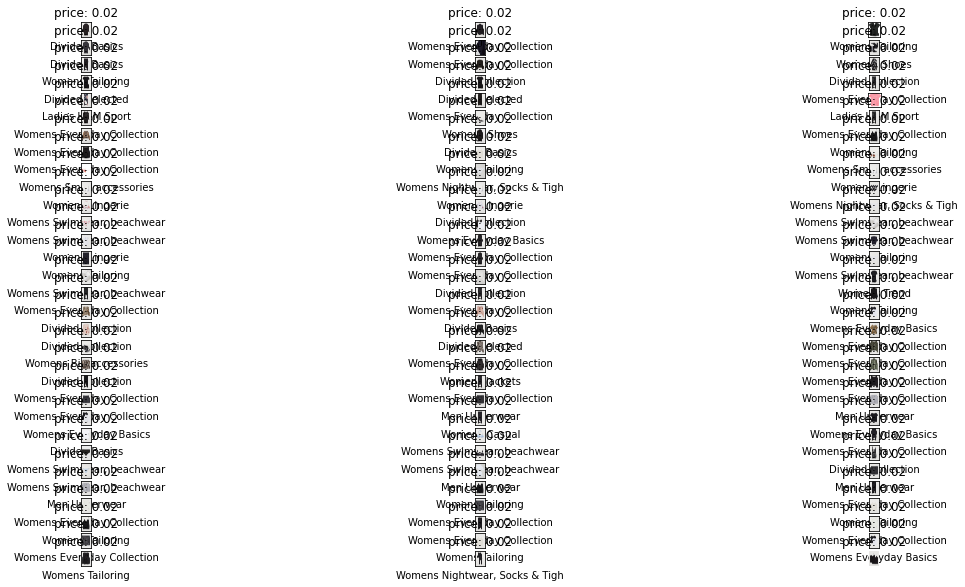

In [279]:
show_buy_items(df,df['customer_id'].values[150])

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687001,0.016932,2
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221001,0.020322,2
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,0688873012,0.030492,1
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,0501323011,0.053373,1
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,0598859003,0.045746,2


In [255]:
h = len(df.iloc[:10]) / 4

In [257]:
h

2.5

In [258]:
import math
math.ceil(h)

3

In [ ]:
#일자별 item show
df[df.customer_id ==df['customer_id'].values[150]]

NameError: name 'desc_list' is not defined

In [278]:
def show_buy_items(df, exp_usr_id):

    data = df[df.customer_id ==exp_usr_id]
    w = 3
    h = len(data) / w
    h = math.ceil(h)
    # 구매한 아이템 이미지
    f, ax = plt.subplots(h, 3, figsize=(20,10))
    i = 0
    k = 0
    for prod in data['article_id'].values.tolist():
        desc = dfi[dfi['article_id'] ==  prod]['detail_desc'].iloc[0]
        desc_list = desc.split(' ')

        for j, elem in enumerate(desc_list):
            if j > 0 and j % w == 0:
                desc_list[j] = desc_list[j] + '\n'

        desc = ' '.join(desc_list)

        section_nm = dfi[dfi['article_id'] ==  prod]['section_name'].iloc[0]
        img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/{str(prod)[:3]}/0{int(prod)}.jpg')
        ax[i][k].imshow(img)
        ax[i][k].set_title(f'price: {data.price.values[0]:.2f}')
        ax[i][k].set_xticks([])
        ax[i][k].set_yticks([])
        ax[i][k].grid(False)
        ax[i][k].set_xlabel(section_nm, fontsize=10)
        k += 1
        if k == w:
            k  = 0
            i += 1
    plt.axis('off')
    plt.show()



In [200]:
def show_buy_items(article_ids):

    # 구매한 아이템 이미지
    f, ax = plt.subplots(6, 6, figsize=(30,15))
    i = 0
    k = 0
    for prod in article_ids:
        desc = dfi[dfi['article_id'] ==  prod]['detail_desc'].iloc[0]
        desc_list = desc.split(' ')

        for j, elem in enumerate(desc_list):
            if j > 0 and j % 5 == 0:
                desc_list[j] = desc_list[j] + '\n'
        desc = ' '.join(desc_list)
        section_nm = dfi[dfi['article_id'] ==  prod]['section_name'].iloc[0]
        img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/{str(prod)[:3]}/0{int(prod)}.jpg')
        ax[i][k].imshow(img)
       # ax[i][k].set_title(f'price: {data.price.values[0]:.2f}')
        #ax[i][k].set_xticks([], [])
        #ax[i][k].set_yticks([], [])
        ax[i][k].grid(False)
        ax[i][k].set_xlabel(section_nm, fontsize=10)
        k += 1
        if k == 5:
            k  = 0
            i += 1
    plt.axis('off')
    plt.show()


In [90]:
# Write Submission CSV
sub = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv')
sub = sub[['customer_id']]

In [91]:


df.article_id.value_counts()#%%

 0685687003    1202
 0685687001    1167
 0685687004    1116
 0685687002    1109
 0539723005     680
               ... 
 0685030002       1
 0619075002       1
 0591963001       1
 0520736002       1
 0681135001       1
Name: article_id, Length: 22071, dtype: int64

In [98]:
preds

,customer_id,prediction
0,-9223343869995384291,0687114002 0670655001 0671613001 0661162002 0...
1,-9223225275836423258,0637661003
2,-9223211958423060038,0718748001
3,-9222997225963363376,0537116001 0621381001
4,-9222798684148120334,0685687003 0685687004 0685687004 0685687002 0...
...,...,...
75428,9222018861260645797,0717130003 0610711001 0692454002
75429,9222278908299164133,0639469001 0228257002 0228257002 0677417002 0...
75430,9222579427591124770,0487722007 0487722007 0688873002 0670752002
75431,9222844312705255886,0654772003 0516903005 0637255001 0637255001


In [ ]:
sub

In [93]:
sub['customer_id_2'] = sub['customer_id'].apply(lambda x :  int( x[-16:],16))

In [94]:

preds.customer_id.nunique()

75433

In [95]:
sub = sub.merge(preds.rename({'customer_id':'customer_id_2'},axis=1), on='customer_id_2',how='left').fillna('')

In [96]:
del sub['customer_id_2']

In [97]:
sub.prediction

0                                                           
1           0583558001 0639677008 0640244003 0521269001 0...
2                           0663713001 0541518023 0663713001
3                                                           
4                                                           
                                 ...                        
1371975                                                     
1371976                                           0671695001
1371977                                           0568597019
1371978                                                     
1371979                                                     
Name: prediction, Length: 1371980, dtype: object

In [79]:
sub.prediction = sub.prediction + top12

In [80]:
sub.prediction


0           0685687003 0685687001 0685687004 0685687002 0...
1           0583558001 0639677008 0640244003 0521269001 0...
2           0663713001 0541518023 0663713001 0685687003 0...
3           0685687003 0685687001 0685687004 0685687002 0...
4           0685687003 0685687001 0685687004 0685687002 0...
                                 ...                        
1371975     0685687003 0685687001 0685687004 0685687002 0...
1371976     0671695001 0685687003 0685687001 0685687004 0...
1371977     0568597019 0685687003 0685687001 0685687004 0...
1371978     0685687003 0685687001 0685687004 0685687002 0...
1371979     0685687003 0685687001 0685687004 0685687002 0...
Name: prediction, Length: 1371980, dtype: object

In [42]:
sub.prediction = sub.prediction.str.strip()
sub.prediction = sub.prediction.str[:131]

In [46]:
sub['prediction'].values[0]

'0685687003 0 0685687001 0 0685687004 0 0685687002 0 0539723005 0 0562245001 0 0683662005 0 0692454002 0 0573085020 0 0524825013 0 0'

In [99]:
sub.to_csv(f'submission.csv',index=False)
sub.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0583558001 0639677008 0640244003 0521269001 0...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001 0541518023 0663713001
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,


In [173]:
sub['prediction'][0]

'00924243001 00924243002 00918522001 00923758001 00866731001 00909370001 00751471001 00915529003 00915529005 00448509014 00762846027'

In [ ]:
drop_cols = [col for col in dfi.columns if '_no' in col]
dfi =dfi.drop(drop_cols,axis=1 )

In [35]:
print('Unique Customer Count : {}'.format(dfu['customer_id'].nunique()))


Unique Customer Count : 1371980


In [36]:
# group 별 targeting

def create_generation_var():
    for age in range(1,10):
        # group 별 인원수
        globals()['{}0'.format(age)] = dfu[dfu.age.astype('str').str.startswith(str(age))]['customer_id'].values.tolist()
        globals()['{}0_gene_prod_group'.format(age)] =  dfi[dfi.article_id.isin(df[df.customer_id.isin(globals()['{}0'.format(age)])]['article_id'].values.tolist())]['product_group_name'].reset_index(drop=True)
        print('Age {}0 generation : {}'.format(age,len(dfu[dfu.age.astype('str').str.startswith(str(age))])))


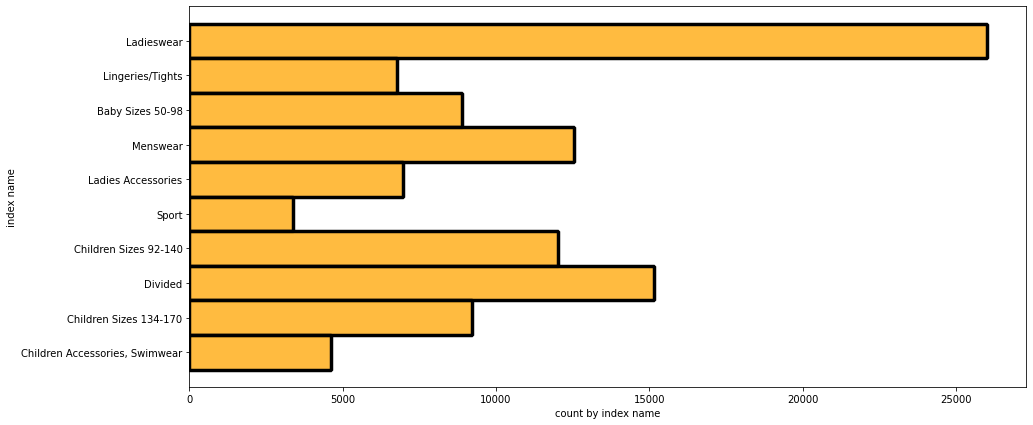

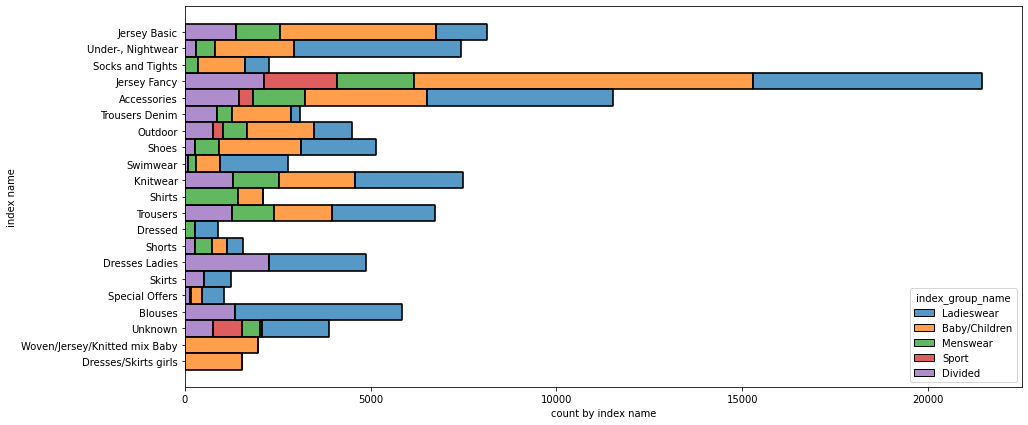

In [ ]:

create_generation_var()

In [ ]:
##

## Find popular item

## data split and grouping age

In [ ]:
SEED=42
y = df['article_id'].values

x_train, x_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2 ,random_state=SEED)
x_train_dfu = x_train.merge(dfu,on='customer_id')




## DATA EDA

In [ ]:
x_train_dfu['age_str'] = x_train_dfu[x_train_dfu.age.str[:1]]

In [ ]:
x_train_dfu['age_group'] = x_train_dfu['age'].astype('str').str[:1]

In [ ]:
merge_data = x_train_dfu.merge(dfi,on='article_id')

In [ ]:
merge_data

In [ ]:
x_train_desc = merge_data['detail_desc']

In [ ]:
na_index = np.where(x_train_desc.isnull())[0]

In [ ]:
na_index2 = np.where(x_train_dfu.age_group =='n')[0]

In [ ]:
drop_index = set(na_index).union(set(na_index2))

In [ ]:
x_train_desc

In [ ]:
drop_index = list(drop_index)

In [ ]:
drop_index[:5]

In [ ]:
x_train_desc

In [ ]:
x_train_desc= x_train_desc.drop(drop_index,axis=0)

In [ ]:
indexing = list(set(np.arange(40000))- set(drop_index))

In [ ]:
y = x_train_dfu.iloc[indexing,:]['age_group'].astype('int').values.tolist()

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x_train_desc)
tfidf_vectorizer.idf_
x_train_desc_tfidf = tfidf_vectorizer.transform(x_train_desc).toarray()

In [ ]:
x_train_desc_tfidf = x_train_desc_tfidf[indexing]

In [ ]:
len(y)

In [ ]:
# 그룹별 detail desc 의 tfidf 값 feature 가 logitic regression 으로 잘 분류되는 지 성능테스트

In [ ]:
cols = sorted(tfidf_vectorizer.vocabulary_.items(), key=lambda x: x[1])

In [ ]:
rows =  merge_data.drop(drop_index,axis=0)['article_id'].values.tolist()


cols  = [col[0] for col in cols]

merge_data.head()

In [ ]:
tfidf_df = pd.DataFrame(columns = cols, data = x_train_desc_tfidf)


tfidf_df.loc[:,'shirt']

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
# tfidf 값 만으로 logisticregression 하지 말고 feature 의 하나로 활용한다 tfidf 를
clf = LogisticRegression(random_state=0,solver='liblinear')
clf.fit(x_train_desc_tfidf,y)
pred =clf.predict(x_train_desc_tfidf)

In [ ]:
# 분류 성능을 파악하여 tfidf 가 나이대를 잘 설명하는 지 확인한다


In [ ]:
y[:10]

In [ ]:
pred[:10]

In [ ]:
f1_score(y,pred, average='micro' )

In [ ]:
# 가격대 , baseline 비슷한 유저대상  추천
df

In [ ]:
#cudf.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')


In [ ]:
dfu

In [ ]:
df

In [ ]:
# average one of [None, 'micro', 'macro', 'weighted']

In [ ]:
# f1 score 값이 높아야 성능이 좋다
f1_score(y,pred,average ='micro')

In [ ]:
# 나이대별로 선호하는 낱말이 있다는 뜻 아닌가?

In [ ]:
 #오차행렬, 정확도, 정밀도, 재현율을 한번에 출력하기 위한 함수 정의

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

In [ ]:


# 사용자별 구매 주기
group_data = df.groupby('customer_id')


# 사용자별 구매주기
# exp_usr
cnt = 0
for customer_id,data in group_data:
    exp_usr_itm = data.article_id.unique()
    exp_usr_id = data.customer_id.unique()[0]
    cnt += 1
    if cnt == 1:
        break


# 연령대별 구매 데이터
# 그룹별 구매 빈도, 패턴

for age in range(1,9):
    age_group = x_train_dfu.groupby('age_group').get_group(str(age))
    print(f'Age {age}0 generation buy count : {len(age_group)}')
    # 나이대 별 구매 아이템 및 종류
    products =  age_group['article_id'].unique()

    print(f"Age {age}0 generation's unique product count : {len(products)}")
    # 30대는 20대에 비해 절반인데도 아이템 종류가 다양하다. 자녀의 아이템을 사거나 개인의 취향이 더 반영 된 듯한 모습
    # 나이대가 올라갈수록 다양한 아이템을 산다
    dfi[dfi.article_id.isin(products)]
    # 나이대별 feature의 다양성

    # 나이대별 tfidf 값으로 어떤 description 을 가진 옷을 선호하는 지 탐색하기
    x_train_desc = x_train_desc.dropna(axis=0)
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(x_train_desc)
    tfidf_vectorizer.idf_
    tfidf_vectorizer.transform(x_train_desc).toarray()

    # catboost train 해보기



In [ ]:
for i , data in x_train_dfu.groupby('customer_id'):
    break

In [ ]:
# REDUCE MEMORY OF DATAFRAME
# hex문자열 int로 변환하기
df = df[['customer_id','article_id']]
#df.customer_id = df.customer_id.str[-16:].str.hex_to_int().astype('int64')
df['customer_id']=  df['customer_id'].apply(lambda x :  int( x[-16:],16))
df.article_id = df.article_id.astype('int32')
_ = gc.collect()

## 함께 구매한 아이템 찾기

In [ ]:
dfu['customer_id'] = dfu['customer_id'].apply(lambda x :  int( x[-16:],16))

In [ ]:
# sparse matrix 되므로 곤란하다
df.groupby(['customer_id','article_id']).count().reset_index()

In [ ]:
df['customer_id']=  df['customer_id'].apply(lambda x :  int( x[-16:],16))

In [ ]:
# 특정 아이템을 선호하는 그룹의 비율을 print해보면 grouping의 의미가 ?
# user based filtering 을 하려면
# 특정 아이템을 구매한 유저들을 유사한 유저로
df[df.customer_id.isin(USERS)].merge(dfu, on='customer_id').age.plot.hist()

In [ ]:
for j , i in enumerate(vc.index.values[1000:1032]):
    print(j,i)
    break


In [ ]:
int(df.customer_id.str[-16:].values[0],16)

In [ ]:
df.customer_id.str[-16:].str.hex_to_int()

In [ ]:
# 연령대별 인기아이템 확인 겸 연령대별 feature를 추출하여 predict

In [ ]:
# 해당 season에 유행한 아이템일 수 있으니 그것도 고려
# 저가 아이템이나 특정 가격의 아이템을 선호할 수도 있다


In [ ]:
vc.index.values[1000:1032]

In [ ]:
# https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/306007
# https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    # remove this case in advance
    # if not actual:
    #     return 0.0

    return score / min(len(actual), k)


def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
x

In [ ]:
# 아이템에 선호하는 그룹대>

In [ ]:
# recommendation collaborative filtering in same group


In [ ]:
# local cv 설정 방법
#https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/308919


In [ ]:
# group user basedfilteroing try
df = df.merge(dfu[['customer_id','age']])

In [ ]:
twenty_generation = df[df.age.astype('str').str.startswith('2')]

In [ ]:
# embedding model 로 test해보기
group_twenty = twenty_generation[['customer_id','article_id','t_dat']].groupby(['customer_id','article_id']).count().reset_index()

In [ ]:
group_twenty = group_twenty.iloc[:500000]

In [ ]:
group_twenty.rename(columns={'t_dat':'count'},inplace=True)

In [ ]:
group_twenty

In [ ]:
pivot_twenty = group_twenty.pivot(index='customer_id',columns = 'article_id', values='count')

In [ ]:
import gc
del df
del twenty_generation
del group_twenty

gc.collect()

In [ ]:
pivot_twenty.dtypes

In [ ]:
# float dtype 은 메모리를 많이 잡아먹는다

In [ ]:
cols =  pivot_twenty.columns

In [ ]:
cols

In [ ]:
pivot_twenty[cols[0]].max() < np.iinfo(np.int32).max

In [ ]:
start_mem

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] =='int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col]= df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col]= df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col]= df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col]= df[col].astype(np.int8)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        end_mem = df.memory_usage().sum() / 1024**2
        if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
        return df

In [ ]:
def reduce_memory_usage(df):

    for col in cols:
        col_type = str(df[col].dtypes)
        if col_type.startswith('float'):


In [ ]:
# reduce memory 여기서 필요하다
reduce_memory_usage

In [ ]:
gc.collect()

In [ ]:
pivot_twenty.fillna(0,inplace=True)

In [ ]:
pivot_twenty

In [ ]:
print(f'overall data lenth : {len(group_twenty)}')

In [ ]:
print(f"Unique article : {len(group_twenty['article_id'].unique())}")

In [ ]:
print(f"Unique customer : {len(group_twenty['customer_id'].unique())}")

In [ ]:
pivot_twenty

In [ ]:

df.t_dat = pd.to_datetime(df.t_dat)

In [ ]:
train = df.loc[df.t_dat <= pd.to_datetime('2020-09-15')]

In [ ]:
valid = df.loc[df.t_dat>= pd.to_datetime('2020-09-16')]

In [ ]:
# data trending 하기
# Step 1

In [ ]:
valid = valid.groupby('customer_id').article_id.apply(list).reset_index()
valid = valid.rename({'article_id':'prediction'},axis=1)
valid['prediction'] = \
        valid.prediction.apply(lambda x: ' '.join(['0'+str(k) for k in x]))


In [ ]:

df_sub = df_sub.set_index('customer_id').loc[valid.customer_id].reset_index()


In [ ]:
df_sub

In [ ]:
mapk(valid.prediction.str.split(), df_sub.prediction.str.split(),k=12)

In [ ]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

In [ ]:
def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
# 구매한 아이템들의 feature 를 해당 사용자와 mapping ?

data

In [ ]:
x_train.merge(dfi,on='article_id')

In [ ]:
dfi['article_id'].nunique()

In [ ]:
show_buy_items( )

In [ ]:
# 같은 prod_name이면서 다른 product_code를 가진 아이템 show 하기

In [ ]:
# merge한 데이터에 tfidvectorizer를 해야 어떤 단어가 더 많이 등장하고 그런 것을 확인할 수 있을 듯 하기는 한데
# 메모리가 부족하다

In [ ]:
# 아이템 설명이 없는 row 제거

In [ ]:
# 각 행별로 tfidf 단어값이 나온다

In [ ]:
x_train

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
reduce_mem_usage(dfu)

In [ ]:
y_train

In [ ]:
merge_data = df.merge(dfi,on='article_id')

In [ ]:
# 연령대별 전체 아이템 그룹
# generation buy product_group_name
#gene_prod_group_vc = gene_prod_group.value_counts()

In [ ]:
reduce_memory_usage(dfi)

In [ ]:
reduce_memory_usage(dfu)

In [ ]:
dfi

In [ ]:
gene_prod_group_vc = globals()['10_gene_prod_group'].value_counts()

In [ ]:
# 전 연령대를 통틀어 상위 아이템이 관심이 많다
show_generation_prefer_group(gene_prod_group_vc , '90')

In [ ]:
exp_usr_id = dfu[dfu.age.astype('str').str.startswith('4')]['age'].values[5]

In [ ]:
data = df[df.customer_id ==exp_usr_id]

In [ ]:
data

In [ ]:
# text 정보에서 최대한 추측해보기
# desc에서 tfidf 하기

In [ ]:
# 아이템 속성 다양히 살펴보고 feature로 만들고 train valid 테스트해보기 ?


In [ ]:
# boost
dfu[dfu.customer_id == exp_usr_id]['club_member_status']

In [ ]:
dfu[dfu.customer_id == exp_usr_id]['fashion_news_frequency']

In [ ]:
# 나이대 탐색
dfu[dfu.customer_id == exp_usr_id]['age'].values[0] in np.arange(40,50).tolist()

In [ ]:
buy_items = df[df.customer_id == exp_usr_id]['article_id'].values.tolist()
# garment upper body 를 좋아하는 경향이 많다
dfi[dfi.article_id.isin(buy_items)]['product_group_name']

In [ ]:
# 40대 여성이 남편 옷 한번 , 자녀 옷, 주로 본인의 옷을 많이 샀다
# kids 의류를 산 True 인 개수의 합
df[df.customer_id == exp_usr_id].merge(dfi[['article_id','prod_name','product_type_name','product_group_name','section_name']] , on = 'article_id').section_name.str.startswith('Kids').values.sum()

In [ ]:
show_buy_ratio(df,exp_usr_id)

In [ ]:
# 그리고 선호하는 옷의 이미지 특성을 탐색해서 유사한 사용자의 옷을 추천하거나 옷의 특성을 탐색해야지, 여백이 많은 옷을 좋아하는 지 화려한 옷을 좋아하는 지 등의

In [ ]:
# 좋아하는 옷을 2벌 3벌 사는 유형이 있다.
# 그리고 그냥 나처럼 가끔 가서 내가 좋아보이는 옷을 사는 유형
dfi[dfi.article_id.isin(buy_items2)]

In [ ]:

# 반복 구매하는 아이템에 대해 가중치를 주고 반복 구매 체크하고 어떤 아이템을 반복 구매했는 지 체크
show_buy_group(df,exp_usr_id)
# 40대 유저는 tailoring 을 많이산다


In [ ]:
show_buy_items(df,exp_usr_id)

In [ ]:
# 40대 사용자 중 랜덤하게 한명 선택
exp_usr_id = np.random.choice( dfu[dfu['age'].astype('str').str.startswith('4')]['customer_id'].values.tolist() , 1 )

In [13]:
df


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,-6846340800584936,663713001,0.050831,2
1,2018-09-20,-6846340800584936,541518023,0.030492,2
2,2018-09-20,-8334631767138808638,505221004,0.015237,2
3,2018-09-20,-8334631767138808638,685687003,0.016932,2
4,2018-09-20,-8334631767138808638,685687004,0.016932,2
...,...,...,...,...,...
299995,2018-09-26,4326589547904435732,591334001,0.016932,2
299996,2018-09-26,4326589547904435732,591334001,0.016932,2
299997,2018-09-26,4326589547904435732,662857002,0.042356,2
299998,2018-09-26,4326589547904435732,662857002,0.042356,2


In [14]:
# 유사한 유저의 아이템 추천하기
dfu

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [16]:
df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,-6846340800584936,663713001,0.050831,2
1,2018-09-20,-6846340800584936,541518023,0.030492,2
2,2018-09-20,-8334631767138808638,505221004,0.015237,2
3,2018-09-20,-8334631767138808638,685687003,0.016932,2
4,2018-09-20,-8334631767138808638,685687004,0.016932,2
...,...,...,...,...,...
299995,2018-09-26,4326589547904435732,591334001,0.016932,2
299996,2018-09-26,4326589547904435732,591334001,0.016932,2
299997,2018-09-26,4326589547904435732,662857002,0.042356,2
299998,2018-09-26,4326589547904435732,662857002,0.042356,2


NameError: name 'sub' is not defined

In [ ]:
def show_buy_group(df,exp_usr_id):

    buy_items = df[df.customer_id == exp_usr_id]['article_id'].values.tolist()
    # garment upper body 를 좋아하는 경향이 많다
    buy_items_group = dfi[dfi.article_id.isin(buy_items)]['product_group_name'].values.tolist()
    k
    return print(buy_items_group)

In [ ]:
show_buy_ratio(df,exp_usr_id )

In [ ]:
show_buy_ratio(df,exp_usr_id)
# 반복 구매하는 아이템에 대해 가중치를 주고 반복 구매 체크하고 어떤 아이템을 반복 구매했는 지 체크

In [ ]:
show_buy_group(df,exp_usr_id)
# 40대 유저는 tailoring 을 많이산다

In [ ]:
show_buy_items(df,exp_usr_id)

In [ ]:
# 중복 비율
df[df.customer_id.isin(globals()['{}0'.format(age)])]['article_id']

In [ ]:
df[df.customer_id.isin(globals()['{}0'.format(age)])]['article_id'].drop_duplicates()

In [ ]:
a

In [ ]:
gene_prod_group

In [ ]:
import random

In [ ]:
dfu.age.plot.hist()

In [ ]:
for idx , prod in enumerate(data['article_id'].values.tolist()):
    print(idx, prod)

In [ ]:
for idx, prod in enumerate(data['article_id'].values.tolist()):
    print(idx)

In [ ]:
desc = dfi[dfi['article_id'] ==  prod]['detail_desc'].iloc[0]

In [ ]:

# 이미지의 특징을 많이 고려 , 내가 그러니까 아무래도 옷은

In [ ]:
# 구매한 아이템 이미지
f, ax = plt.subplots(5, 5, figsize=(30,15))
i = 0
k = 0
for prod in data['article_id'].values.tolist():
    desc = dfi[dfi['article_id'] ==  prod]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')

    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    section_nm = dfi[dfi['article_id'] ==  prod]['section_name'].iloc[0]
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/{str(prod)[:3]}/0{int(prod)}.jpg')
    ax[i][k].imshow(img)
    ax[i][k].set_title(f'price: {data.price.values[0]:.2f}')
    ax[i][k].set_xticks([], [])
    ax[i][k].set_yticks([], [])
    ax[i][k].grid(False)
    ax[i][k].set_xlabel(section_nm, fontsize=10)
    k += 1
    if k == 5:
        k  = 0
        i += 1
plt.axis('off')
plt.show()

In [ ]:
cols = df.columns.tolist()

In [ ]:
# in 연산자는 list에서만
# df[cols[3]].dtypes in 'float64' x

In [ ]:
reduce_mem_usage(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df

In [ ]:
x_train , x_valid , y_train ,y_valid = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [ ]:
col_type in numerics

In [ ]:
# 연령대 분포
plt.figure(figsize=(20,7))
sns.histplot(dfu['age'])

In [ ]:
dfi['article_id'].nunique()

In [ ]:
# 그룹별 구매 아이템의 특징


In [ ]:
df

![](http://)

In [ ]:
df_sub

In [ ]:
# article_id count 인기 품목
df.groupby('article_id').count().reset_index()

In [ ]:
# 가장 많이 팔린 품목 또한 여성 제품
dfi[dfi['article_id'] == '0108775015']